In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["text.usetex"] = True
import seaborn as sn
from  matplotlib.colors import LinearSegmentedColormap
my_cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
my_cmap_r=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256) 
import matplotlib.ticker as ticker

In [2]:
fs = 15

# Sinc function and hyperparameters

## Tuning with a validation est

In [54]:
results = pd.read_csv("Data/sinc_results.csv")
gam_values = results["Gamma"].unique()
sig2_values = results["Sig2"].unique()
mse_values = results["MSE"].values
mse_values = mse_values.reshape((len(gam_values), len(sig2_values)))
results

,Gamma,Sig2,MSE
0,10,0.01,0.009126
1,10,0.10,0.008256
2,10,1.00,0.032025
3,10,10.00,0.113283
4,10,100.00,0.133822
5,10,1000.00,0.140986
6,100,0.01,0.009708
7,100,0.10,0.008269
8,100,1.00,0.012914
9,100,10.00,0.108703


In [55]:
# Now turn into matrix
matrix = pd.DataFrame(mse_values)
matrix.set_index(gam_values, inplace = True)
matrix.columns = sig2_values
matrix

,0.01,0.10,1.00,10.00,100.00,1000.00
10,0.009126,0.008256,0.032025,0.113283,0.133822,0.140986
100,0.009708,0.008269,0.012914,0.108703,0.118629,0.140173
1000,0.009977,0.008298,0.009699,0.085466,0.115748,0.133769
10000,0.010046,0.008366,0.008296,0.067806,0.115715,0.118722
100000,0.010113,0.008506,0.008328,0.065634,0.115161,0.115948
1000000,0.010147,0.008616,0.008364,0.057747,0.110027,0.115972


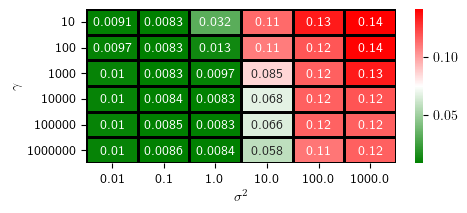

In [56]:
plt.figure(figsize=(5,2))
sn.heatmap(matrix, annot=True, cmap=my_cmap_r, linewidths=1, linecolor='black')
# plt.title("Random split")
plt.xlabel(r"$\sigma^2$")
plt.ylabel(r"$\gamma$")

plt.savefig("Plots/sinc_validation_tuning.pdf", bbox_inches='tight')
plt.show()

## Tune with $\texttt{tunelssvm}$

Note: accidentally swapped gamma and algorithm!

In [59]:
results = pd.read_csv("Data/sinc_tuning_results.csv")
gridsearch = results[results["Algorithm"] == "gridsearch"]
simplex = results[results["Algorithm"] == "simplex"]
gridsearch

,Algorithm,Gamma,Sig2,MSE
0,gridsearch,14.607837,0.312826,0.010769
1,gridsearch,41184.724480,0.897818,0.010654
2,gridsearch,9.789727,0.252032,0.010717
3,gridsearch,6843.717893,0.751831,0.010700
4,gridsearch,26.388764,0.359117,0.010787
...,...,...,...,...
95,gridsearch,21.887567,0.340166,0.010773
96,gridsearch,12551.668821,0.853939,0.010732
97,gridsearch,19.833815,0.322942,0.010754
98,gridsearch,10.630273,0.239581,0.010701


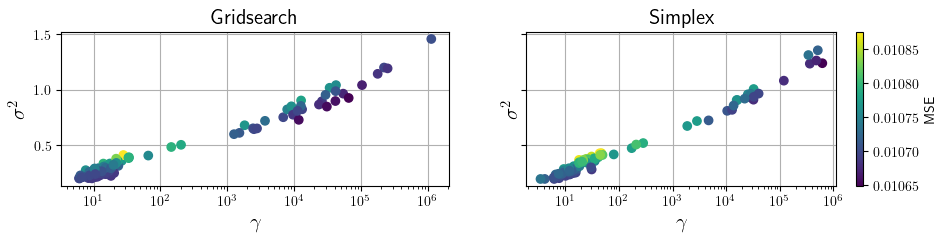

In [78]:
plt.subplots(nrows = 1, ncols = 2, figsize=(11,2), sharey=True)

df_list = [gridsearch, simplex]
title_list = ["Gridsearch", "Simplex"]

for i, df in enumerate(df_list):
    plt.subplot(1,2,i+1)
    gam_values = df["Gamma"].values
    sig2_values = df["Sig2"].values
    mse_values = df["MSE"].values
    plt.scatter(gam_values, sig2_values, c = mse_values, zorder=100)
    plt.title(title_list[i], fontsize=fs)
    plt.xlabel(r"$\gamma$", fontsize=fs)
    plt.ylabel(r"$\sigma^2$", fontsize=fs)
    plt.xscale('log')
    plt.grid()
    
cbar = plt.colorbar()
cbar.set_label("MSE")

plt.savefig("Plots/sinc_tunelssvm.pdf", bbox_inches = 'tight')
plt.show()

In [65]:
print("The average (gam, s2) for gridsearch is: (%0.3f, %0.3f)" % (np.mean(gridsearch["Gamma"]), np.mean(gridsearch["Sig2"])))
print("The average (gam, s2) for simplex is: (%0.3f, %0.3f)" % (np.mean(simplex["Gamma"]), np.mean(simplex["Sig2"])))
print("The average MSE for gridsearch was: %0.5f pm %0.5f" % (np.mean(gridsearch["MSE"]), np.std(gridsearch["MSE"])))
print("The average MSE for simplex was: %0.5f pm %0.5f" % (np.mean(simplex["MSE"]), np.std(simplex["MSE"])))
print("The best MSE for gridsearch was: %0.5f " % (np.min(gridsearch["MSE"])))
print("The best MSE for simplex was: %0.5f " % (np.min(simplex["MSE"])))

The average (gam, s2) for gridsearch is: (23633.262, 0.468)
The average (gam, s2) for simplex is: (27951.014, 0.456)
The average MSE for gridsearch was: 0.01073 pm 0.00005
The average MSE for simplex was: 0.01074 pm 0.00005
The best MSE for gridsearch was: 0.01064 
The best MSE for simplex was: 0.01065 


## Adding Bayesian optimization as well

In [77]:
bayes_results = pd.read_csv("Data/sinc_Bayes_results.csv")
gam_values = bayes_results["Gamma"].unique()
sig2_values = bayes_results["Sig2"].unique()
mse_values = bayes_results["MSE"].values
reps_values = bayes_results["Nb repetitions"].values
bayes_results

,Gamma,Sig2,MSE,Nb repetitions
0,0.354869,0.217380,0.643686,1
1,0.088306,0.217381,0.012881,2
2,0.088306,0.217381,0.025573,3
3,0.088306,0.217381,0.025573,4
4,0.088306,0.217381,0.025573,5


# ARD by crossvalidation

In [19]:
df = pd.read_csv("Data/sinc_ARD_CV.csv").sort_values(by = ["MSE"])
subsets = df["Subset"].values
mse = df["MSE"].values

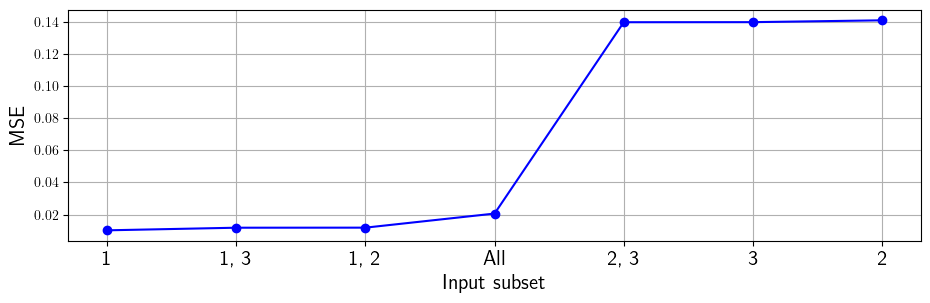

In [20]:
plt.figure(figsize=(11,3))
plt.plot(mse, '-o', color="blue")
plt.xticks([i for i in range(len(mse))], labels = subsets, fontsize = fs)
plt.ylabel("MSE", fontsize=fs)
plt.xlabel("Input subset", fontsize=fs)
plt.grid()
plt.savefig("Plots/sinc_ARD_by_crossvalidation.pdf", bbox_inches = 'tight')
plt.show()

# Logmap crossvalidation

In [43]:
df = pd.read_csv("Data/logmap_order_results.csv")
order = df["Order"].values
mse = df["MSE"].values

In [44]:
best_index = np.argmin(mse)
best_order = order[best_index]
print(f"Best order determined by CV was: {best_order}")

Best order determined by CV was: 4


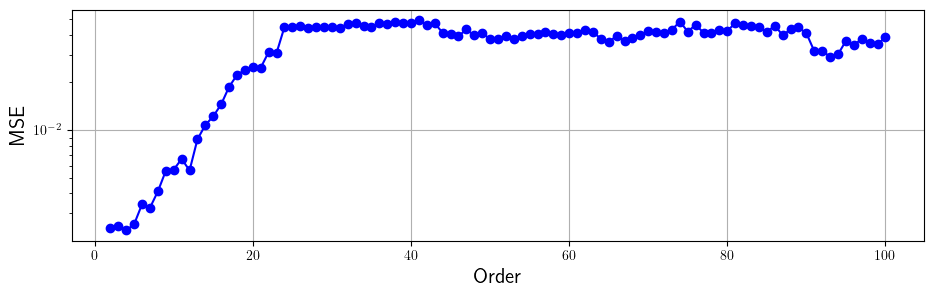

In [45]:
plt.figure(figsize=(11,3))
plt.plot(order, mse, '-o', color="blue")
plt.ylabel("MSE", fontsize=fs)
plt.xlabel("Order", fontsize=fs)
plt.grid()
plt.yscale('log')
plt.savefig("Plots/logmap_order_CV.pdf", bbox_inches = 'tight')
plt.show()

## Plot the data and predictions

In [46]:
logmap_train = np.loadtxt("Data/logmap_train.txt")
logmap_test = np.loadtxt("Data/logmap_test.txt")
logmap_pred = np.loadtxt("Data/logmap_pred.txt")

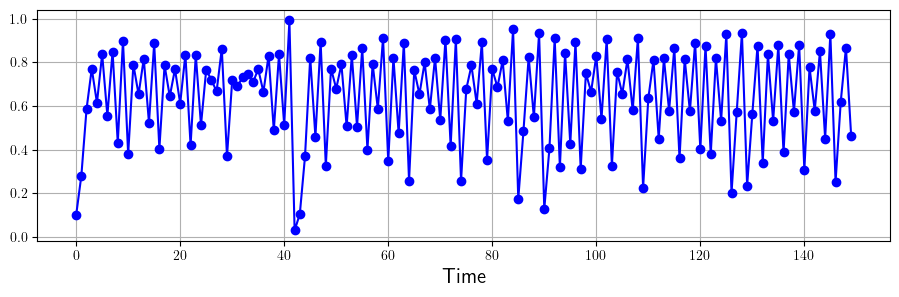

In [47]:
plt.figure(figsize=(11,3))
plt.plot(logmap_train, '-o', color="blue")
plt.grid()
plt.xlabel("Time", fontsize=fs)
plt.savefig("Plots/logmap_train.pdf", bbox_inches = 'tight')
plt.show()

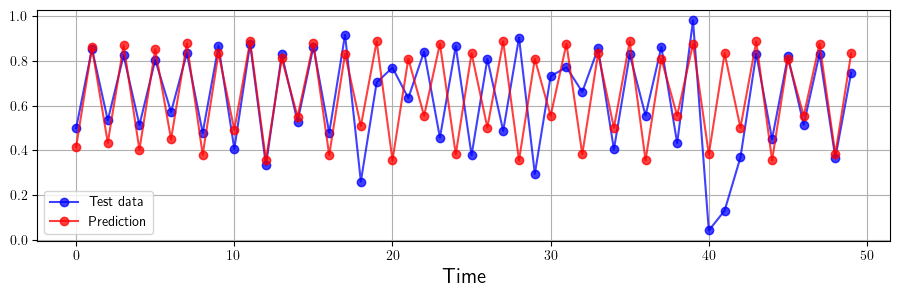

In [48]:
plt.figure(figsize=(11,3))
alph = 0.75
plt.plot(logmap_test, '-o', color="blue", label = "Test data", alpha=alph)
plt.plot(logmap_pred, '-o', color="red", label = "Prediction", alpha=alph)
plt.grid()
plt.legend()
plt.xlabel("Time", fontsize=fs)
plt.savefig("Plots/logmap_prediction.pdf", bbox_inches = 'tight')
plt.show()